In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Colored Scatterplots

In [3]:
iris = pd.read_csv('../datasets/iris.csv')
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
110,111,6.5,3.2,5.1,2.0,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica


In [4]:
iris['Species'] = iris['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
iris.sample(5)

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_91932/572492303.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['Species'] = iris['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
19,20,5.1,3.8,1.5,0.3,0
32,33,5.2,4.1,1.5,0.1,0
115,116,6.4,3.2,5.3,2.3,2
61,62,5.9,3.0,4.2,1.5,1
20,21,5.4,3.4,1.7,0.2,0


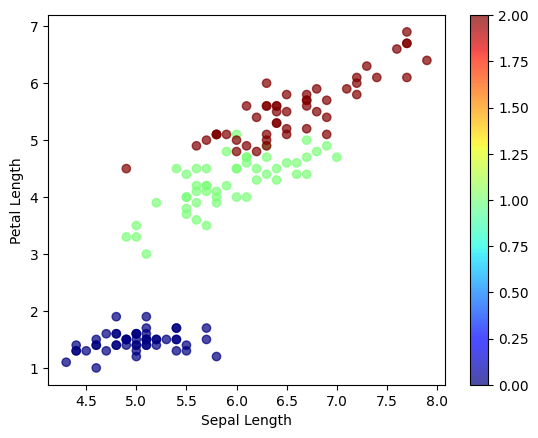

In [5]:
plt.scatter(iris['SepalLengthCm'],iris['PetalLengthCm'],c=iris['Species'],cmap='jet',alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.colorbar()

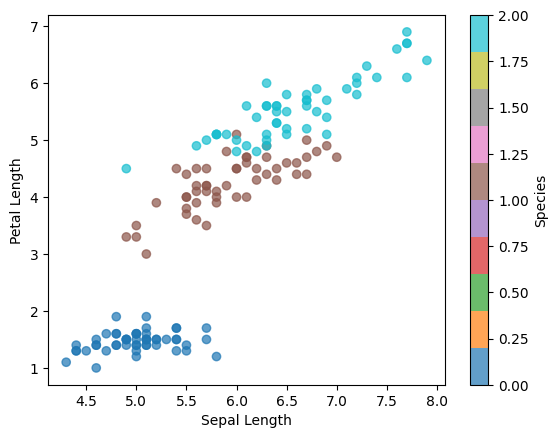

In [6]:
iris['Species_code'] = iris['Species'].astype('category').cat.codes

plt.scatter(
    iris['SepalLengthCm'],
    iris['PetalLengthCm'],
    c=iris['Species_code'],
    cmap='tab10',   # better for categories
    alpha=0.7
)

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.colorbar(label='Species')
plt.show()


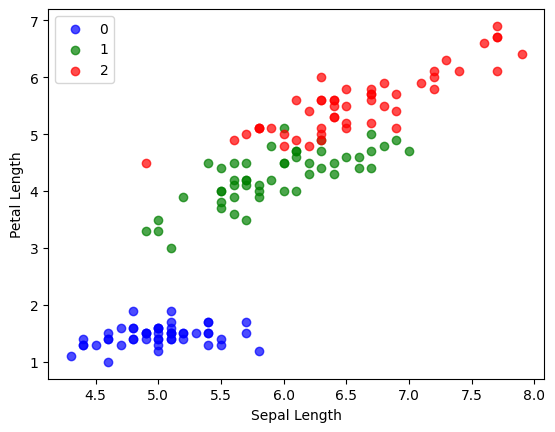

In [7]:
for species, color in zip(iris['Species'].unique(), ['blue','green','red']):
    subset = iris[iris['Species'] == species]
    plt.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        label=species,
        color=color,
        alpha=0.7
    )

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()


### Plot size

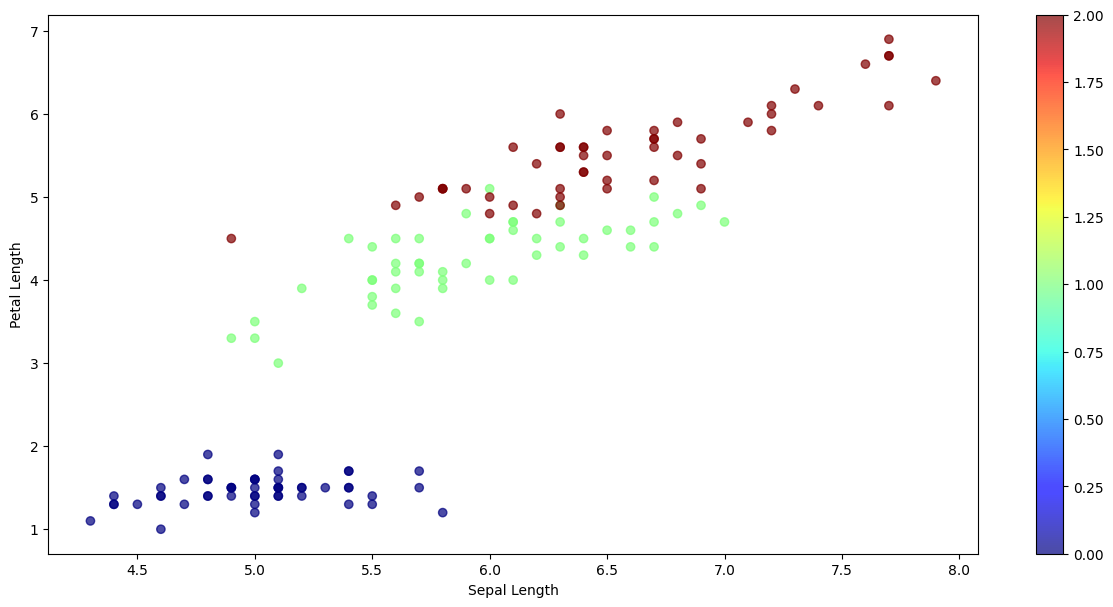

In [8]:
plt.figure(figsize=(15,7))

plt.scatter(iris['SepalLengthCm'],iris['PetalLengthCm'],c=iris['Species'],cmap='jet',alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.colorbar()

In [10]:
batters = pd.read_csv('../datasets/batter.csv')
batters.head()

,batter,runs,avg,strike_rate
0,V Kohli,6634,36.251366,125.977972
1,S Dhawan,6244,34.882682,122.840842
2,DA Warner,5883,41.429577,136.401577
3,RG Sharma,5881,30.314433,126.964594
4,SK Raina,5536,32.374269,132.535312


In [11]:
batters.shape

(605, 4)

In [15]:
sample_df = batters.head(100).sample(25,random_state=5)

In [21]:
sample_df

,batter,runs,avg,strike_rate
66,KH Pandya,1326,22.100000,132.203390
32,SE Marsh,2489,39.507937,130.109775
46,JP Duminy,2029,39.784314,120.773810
28,SA Yadav,2644,29.707865,134.009123
74,IK Pathan,1150,21.698113,116.751269
23,JC Buttler,2832,39.333333,144.859335
10,G Gambhir,4217,31.007353,119.665153
20,BB McCullum,2882,27.711538,126.848592
17,KA Pollard,3437,28.404959,140.457703
35,WP Saha,2427,25.281250,124.397745


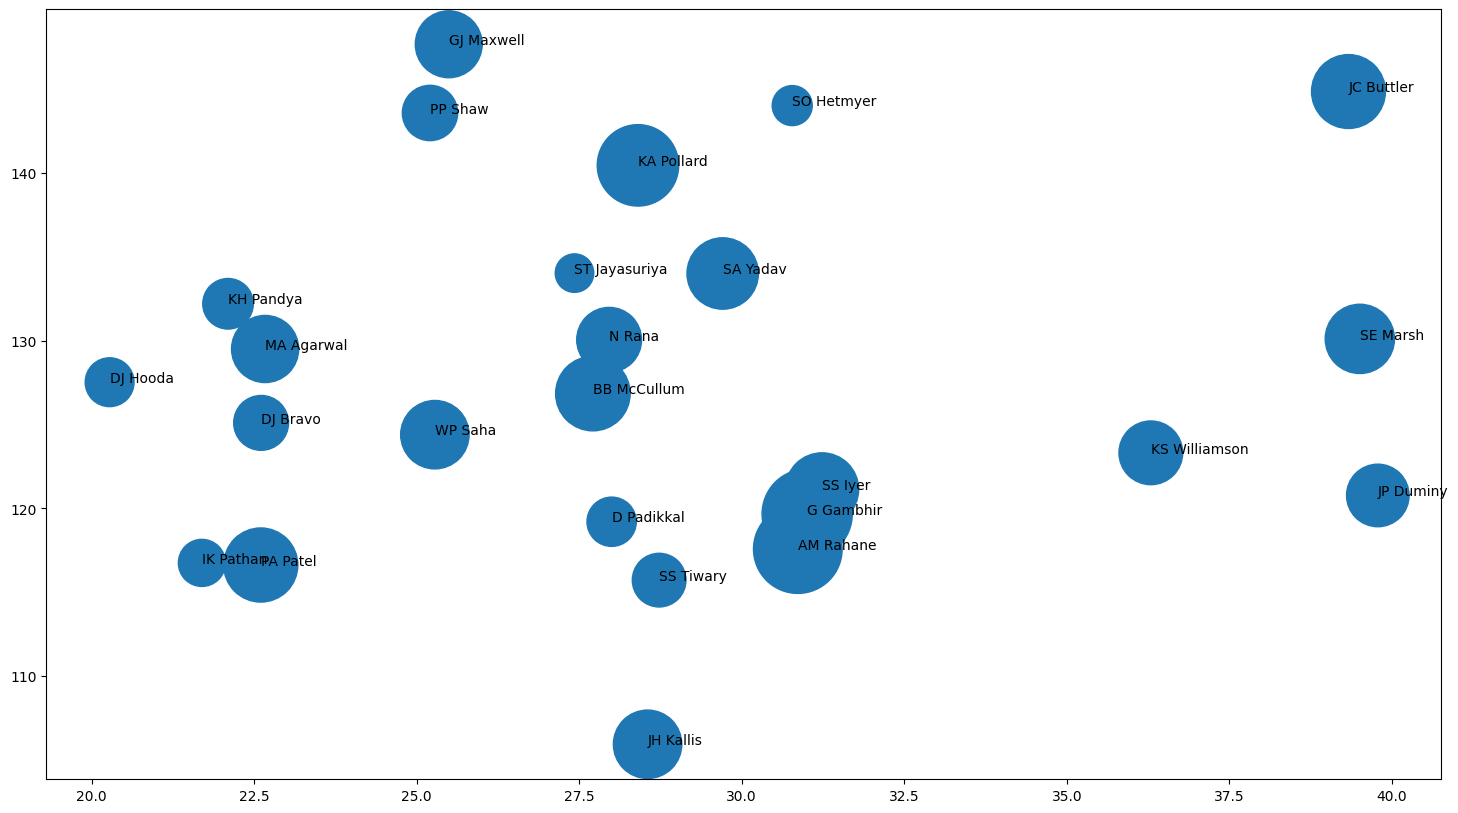

In [19]:
plt.figure(figsize=(18,10))
plt.scatter(sample_df['avg'],sample_df['strike_rate'],s=sample_df['runs'])

for i in range(sample_df.shape[0]):
  plt.text(sample_df['avg'].values[i],sample_df['strike_rate'].values[i],sample_df['batter'].values[i])

In [ ]:
sample_df.shape[0]

25

Text(4, 8, 'Point 4')

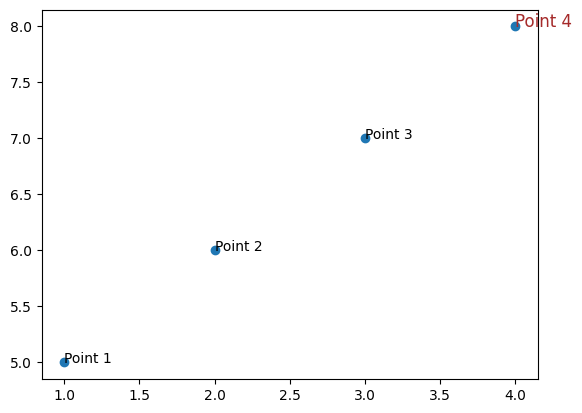

In [23]:
x = [1,2,3,4]
y = [5,6,7,8]

plt.scatter(x,y)
plt.text(1,5,'Point 1')
plt.text(2,6,'Point 2')
plt.text(3,7,'Point 3')
plt.text(4,8,'Point 4',fontdict={'size':12,'color':'brown'})

### Horizontal and Vertical lines

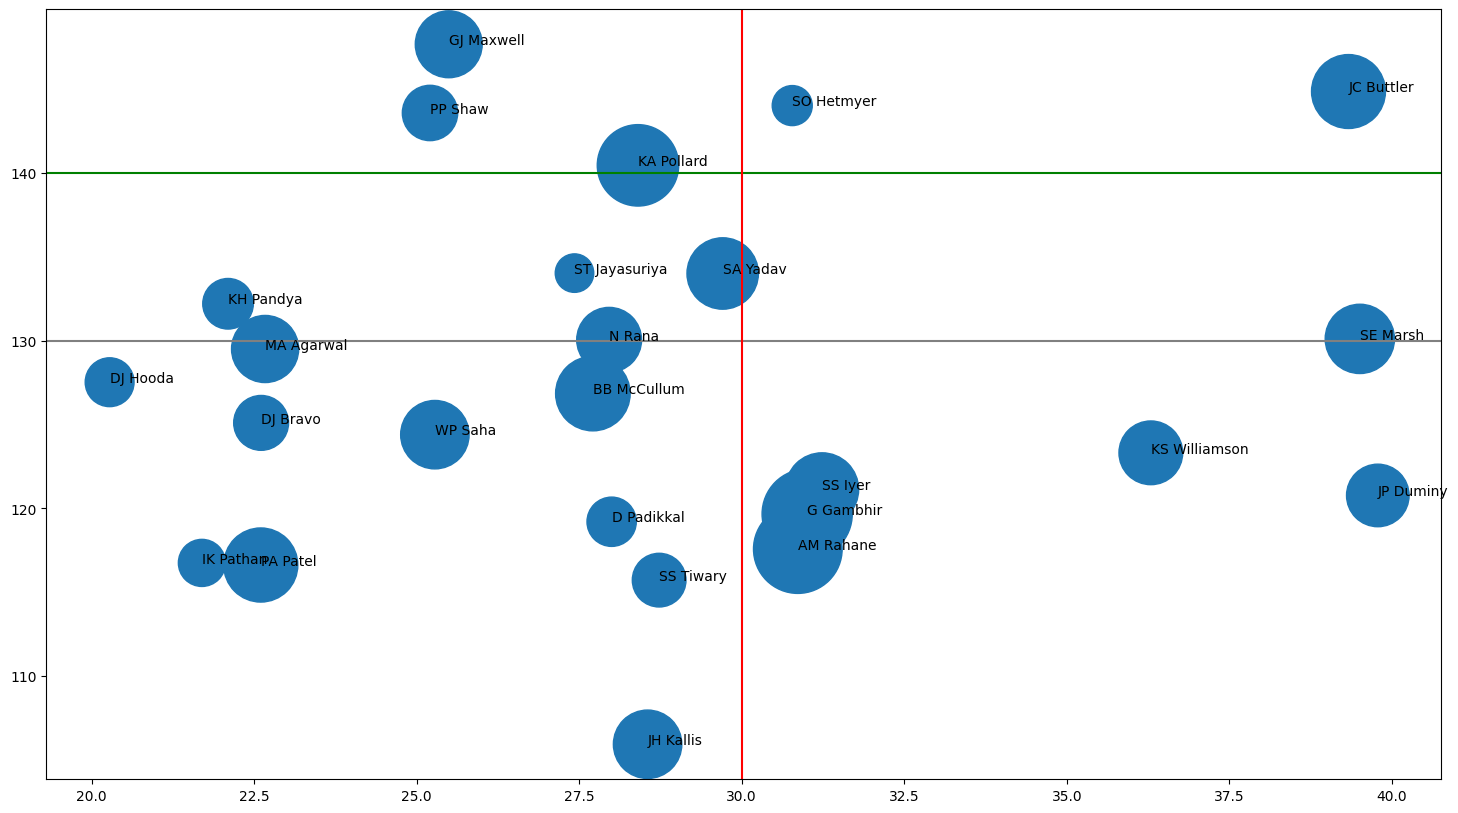

In [26]:
plt.figure(figsize=(18,10))
plt.scatter(sample_df['avg'],sample_df['strike_rate'],s=sample_df['runs'])

plt.axhline(130,color='grey')
plt.axhline(140,color='green')
plt.axvline(30,color='red')

for i in range(sample_df.shape[0]):
  plt.text(sample_df['avg'].values[i],sample_df['strike_rate'].values[i],sample_df['batter'].values[i])

### Subplots

In [27]:
# A diff way to plot graphs
batters.head()

,batter,runs,avg,strike_rate
0,V Kohli,6634,36.251366,125.977972
1,S Dhawan,6244,34.882682,122.840842
2,DA Warner,5883,41.429577,136.401577
3,RG Sharma,5881,30.314433,126.964594
4,SK Raina,5536,32.374269,132.535312


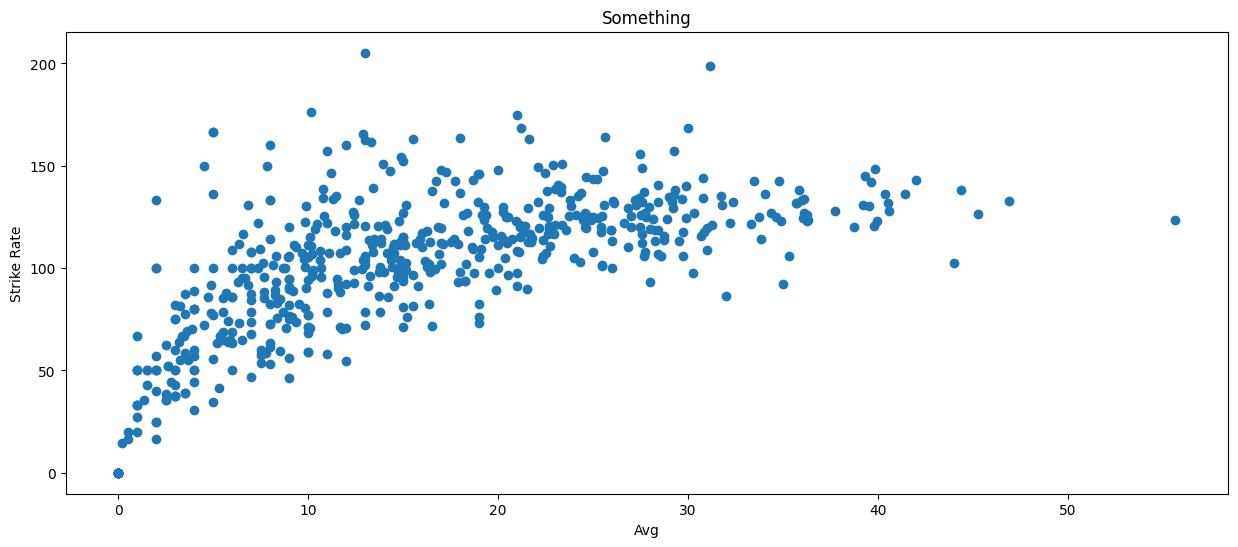

In [28]:
plt.figure(figsize=(15,6))
plt.scatter(batters['avg'],batters['strike_rate'])
plt.title('Something')
plt.xlabel('Avg')
plt.ylabel('Strike Rate')

plt.show()

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_91932/3179312453.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


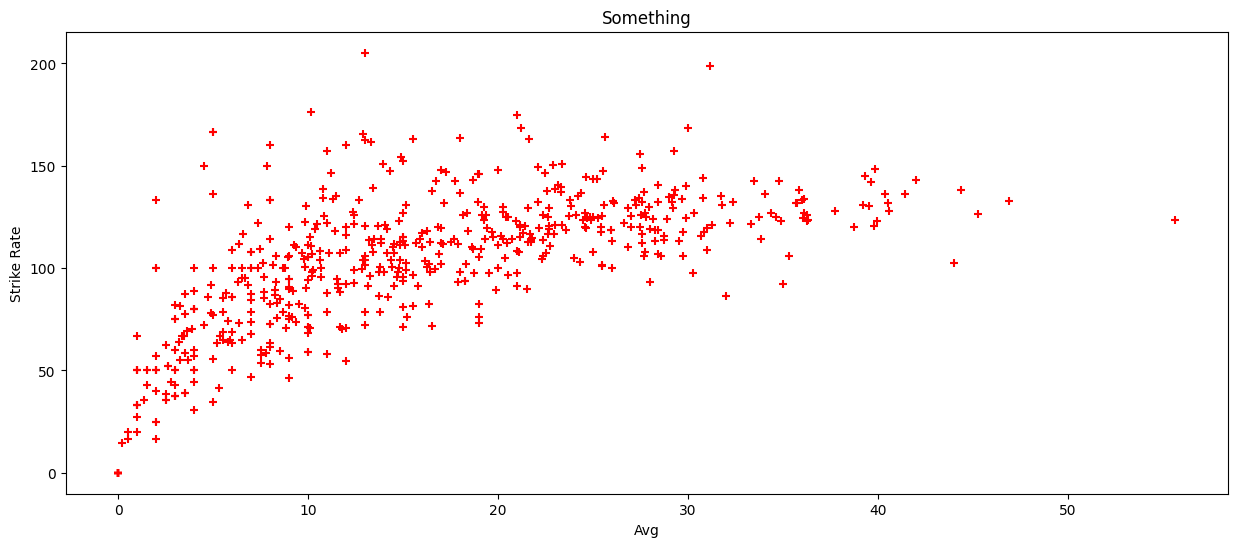

In [30]:
fig,ax = plt.subplots(figsize=(15,6))

ax.scatter(batters['avg'],batters['strike_rate'],color='red',marker='+')
ax.set_title('Something')
ax.set_xlabel('Avg')
ax.set_ylabel('Strike Rate')

fig.show()

Text(0.5, 0, 'Avg')

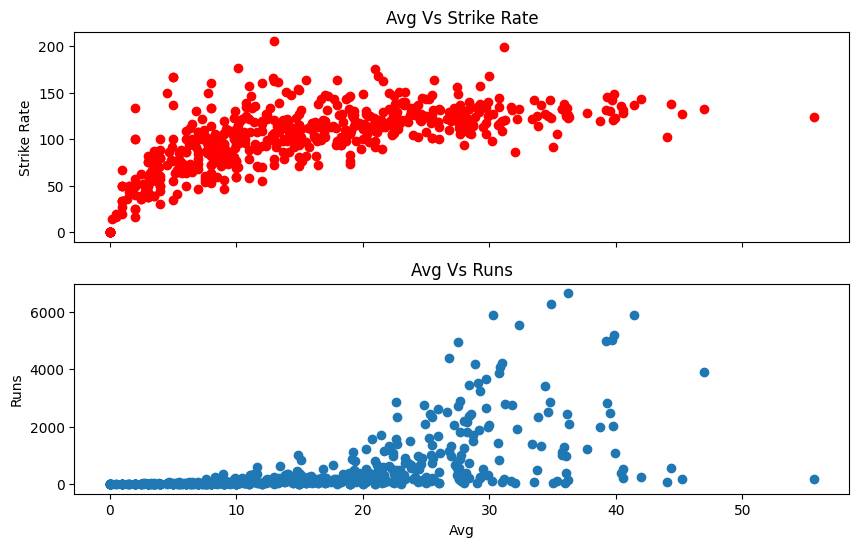

In [33]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(10,6))

ax[0].scatter(batters['avg'],batters['strike_rate'],color='red')
ax[1].scatter(batters['avg'],batters['runs'])

ax[0].set_title('Avg Vs Strike Rate')
ax[0].set_ylabel('Strike Rate')


ax[1].set_title('Avg Vs Runs')
ax[1].set_ylabel('Runs')
ax[1].set_xlabel('Avg')

(array([499.,  40.,  19.,  19.,   9.,   6.,   4.,   4.,   3.,   2.]),
 array([   0. ,  663.4, 1326.8, 1990.2, 2653.6, 3317. , 3980.4, 4643.8,
        5307.2, 5970.6, 6634. ]),
 <BarContainer object of 10 artists>)

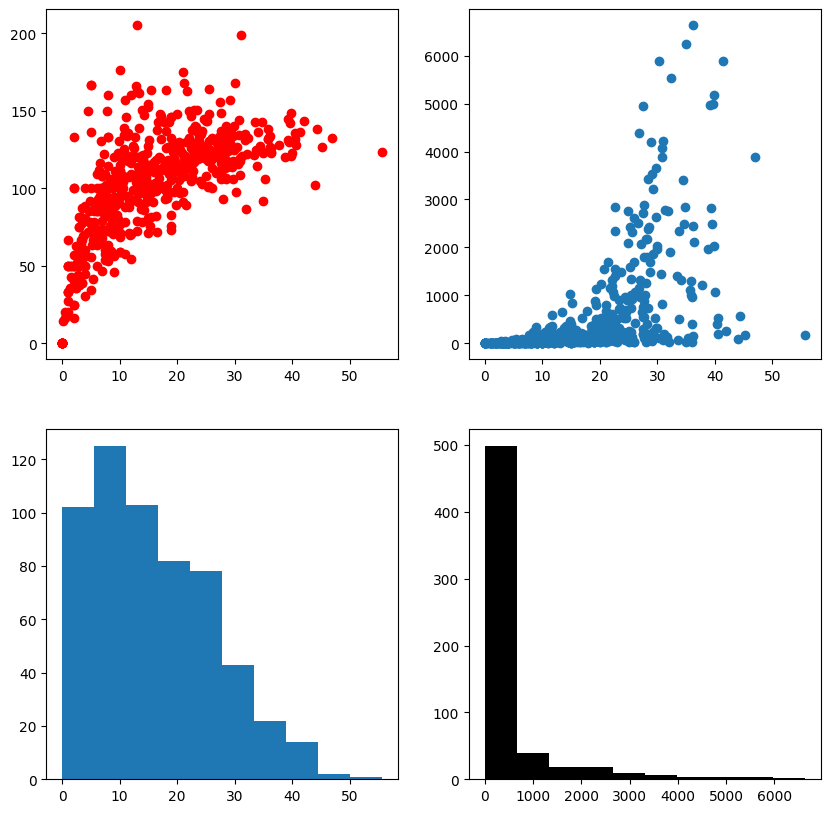

In [47]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax[0,0].scatter(batters['avg'],batters['strike_rate'],c='red')
ax[0,1].scatter(batters['avg'],batters['runs'])
ax[1,0].hist(batters['avg'])
ax[1,1].hist(batters['runs'],color='black')

(array([102., 125., 103.,  82.,  78.,  43.,  22.,  14.,   2.,   1.]),
 array([ 0.        ,  5.56666667, 11.13333333, 16.7       , 22.26666667,
        27.83333333, 33.4       , 38.96666667, 44.53333333, 50.1       ,
        55.66666667]),
 <BarContainer object of 10 artists>)

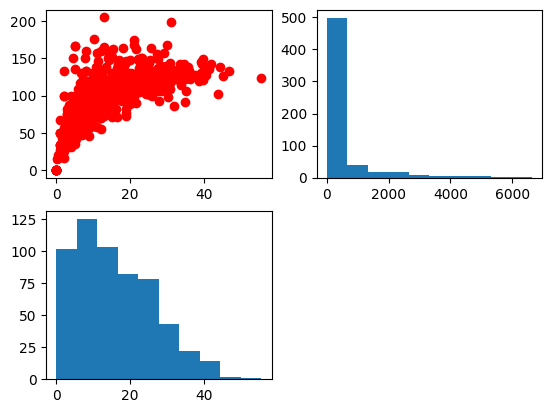

In [51]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.scatter(batters['avg'],batters['strike_rate'],color='red')

ax2 = fig.add_subplot(2,2,2)
ax2.hist(batters['runs'])

ax3 = fig.add_subplot(2,2,3)
ax3.hist(batters['avg'])

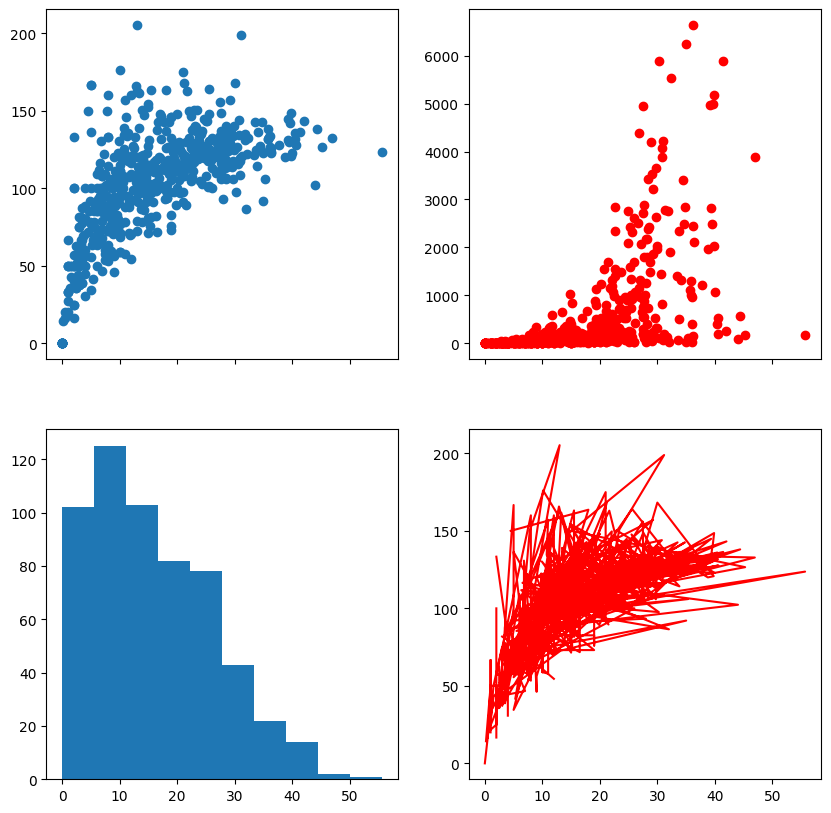

In [71]:
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,10))

ax[0,0].scatter(batters['avg'],batters['strike_rate'])
ax[0,1].scatter(batters['avg'],batters['runs'],color='red')
ax[1,0].hist(batters['avg'])
ax[1,1].plot(batters['avg'],batters['strike_rate'],color='red')



<Axes: >

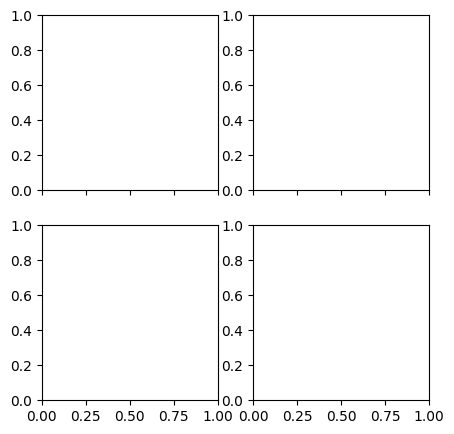

In [75]:
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(5,5))

ax[1,1]

### 3D Scatter Plots

<Axes3D: >

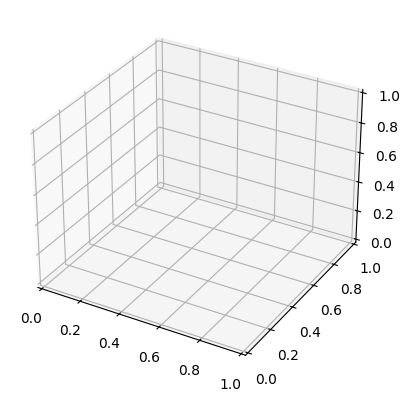

In [78]:
plt.subplot(projection='3d')

Text(0.5, 0, 'SR')

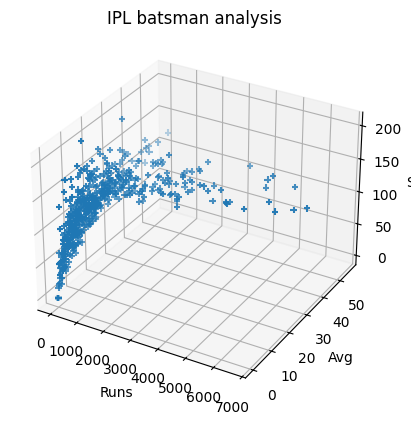

In [81]:
batters

fig = plt.figure()

ax = plt.subplot(projection='3d')

ax.scatter3D(batters['runs'],batters['avg'],batters['strike_rate'],marker='+')
ax.set_title('IPL batsman analysis')

ax.set_xlabel('Runs')
ax.set_ylabel('Avg')
ax.set_zlabel('SR')